# Linear regression template reflective journal


### Use this to guide you to build a simple linear regression project

### A quick overview of the data

American health insurance is Expensive! There are number of factors that come in to play in calculating a persons insurance premium, this includes age,dependants,region and sex to name but a few.

This is an ideal place to bring in a model to predict continuous variables like linear regression.

In this case due to the large number of factors multiple linear regression is used in this notebook.


#### 1. import all libraries you need Pandas, scikit, numpy etc


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns

#### 2. Load in your data set

In [2]:
# use relative path to load in dataset

path = "./insurance.csv"

df = pd.read_csv(path)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 3. format and clean your data

In [3]:
 df.isnull().sum().sum()
# no nulls so that's good

# all other data is relevant so move on to encoding

0

#### 4. encode any categorical data in to dummies/ 1-hot

In [4]:
# encoding can be done in many ways
# we can define our own encoders here is a simple one with some error detection for encoding yes/no

def yes_no_encoder(x):
    try:
        if x.lower() == "no":
            return 0
        elif x.lower()=='yes':
            return 1
        else:
            return 'text not encodeable!'
        
    except: 
        print('something is wrong with your fields expected string type')
        
        
#use the .apply() method to use the encoder on one column
df['smoker'] = df['smoker'].apply(yes_no_encoder)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [5]:
# now to encode sex, we could use our own encoder but let's try a prebuilt one

df_encoded = pd.get_dummies(df, drop_first = True)
# adding the drop first option will help avoid multicolinearity issues


# saving it to a new dataframe
df_encoded.head()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0


In [6]:
# now move charges to the end of the data frame so that it is easier to find

# list comprehension to collect everything except charges in to 1 data frame, then append charges to the end of the dataframe.
df_encoded = df_encoded[[c for c in df_encoded if c not in ['charges']] + ['charges']]

#check it worked
df_encoded.head()

,age,bmi,children,smoker,sex_male,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,1,0,0,0,1,16884.92400
1,18,33.770,1,0,1,0,1,0,1725.55230
2,28,33.000,3,0,1,0,1,0,4449.46200
3,33,22.705,0,0,1,1,0,0,21984.47061
4,32,28.880,0,0,1,1,0,0,3866.85520


#### 5. check for any correlations between fields remove fields that have co-correlations as they often mask eachother's effects.

<AxesSubplot:>

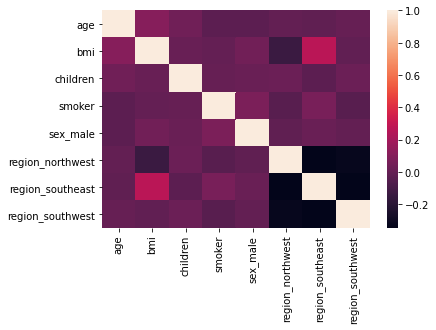

In [7]:
# 
pred = df_encoded.iloc[:,-1:]

#we already used the dropfirst feature of encoding to try and avoid correlations/multicolinearity but best to check
features = df_encoded.iloc[:,:-1]


sns.heatmap(features.corr())

In [8]:
# things are looking pretty good so onwards to train test split

#### 6. Complete your train test split

In [9]:
#select columns for predictors and dependant variable
dependant_variable = 'charges'
predictors = ['age','bmi']


X = df_encoded[predictors]
y= df_encoded[dependant_variable]

#use unpacking to assign all the variables at once
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
#check to see train test has worked
print(f"features are ..... \n\n {X_train.head()} \n\n\n predicted is ...\n\n {y_train.head()}")

features are ..... 

       age     bmi
563    50  44.770
659    57  28.785
653    45  36.300
914    33  24.605
1214   27  31.255 


 predicted is ...

 563      9058.73030
659     14394.39815
653      8527.53200
914      5257.50795
1214     3956.07145
Name: charges, dtype: float64


In [11]:
# this looks perfect on to the next stage

#### 7. create a linear regression object and fit it to your training data

In [12]:
#create a linear regression object
lr=LinearRegression() 


In [13]:
# use the fit method to train our model
lr.fit(X_train,y_train)

LinearRegression()

#### 8. test your model

In [14]:
# you can use predict() to get an array of the predicted values
#lr.predict(X_test)


#score will rate the accuracy of your model out of 1.0 for a better picture of performance 
# you will want to calculate individiual parameters

a = lr.score(X_test,y_test)



print(f'result for linear regression was {a}')

result for linear regression was 0.12653768591124093


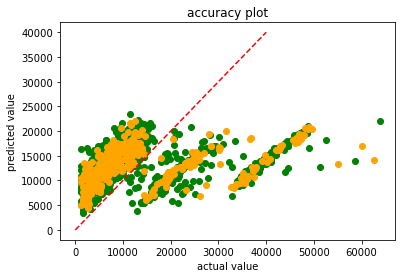

In [15]:
# let's graph it and see how it performed

# show training data predicted using lr
plt.scatter(y_train,lr.predict(X_train), color = 'green')

# show test data predicted using lr
plt.scatter(y_test,lr.predict(X_test), color = 'orange')

#accuracy line this line shows where prediction matched the result exactly
plt.plot([0,40000],[0,40000],'r--')


plt.title('accuracy plot')
plt.xlabel('actual value')
plt.ylabel('predicted value')

plt.show()

In [16]:
# we can also use the test metrics to get a more clear picture of our models performance

In [17]:
# these are focused on the test data, we could also calculate for the training data too.
print('MAE:', metrics.mean_absolute_error(y_test,lr.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test,lr.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lr.predict(X_test))))

MAE: 9469.28492601139
MSE: 149168227.67112437
RMSE: 12213.444545709632


In [18]:
# last check is to see what the coefficients are, do they make sense? are any significantly over weighted? 
# bear in mind no scaling has happened so these coefficients are multiplying raw figures.
lr.coef_


array([209.49745624, 350.96768936])

#### 9. use your model

In [19]:
# by writing a few funcitons we can set up a live input to see if the model has any extreme reactions

# function to turn user input in to the correct form
def yes_no_encoder2(x):
    try:
        if x.lower() == "n":
            return 0
        elif x.lower()=='y':
            return 1
        else:
            return float(x)
        
    except: 
        print('something is wrong check the data you are inputting')

# function to take user input and return a predicted insurance premium
def insurance_checker():
    input_data = []
    qs = predictors
    i=0
    while len(input_data)<len(predictors):
        input_data.append(yes_no_encoder2(input(qs[i])))
        i+=1
    inputs = np.array(input_data)
    x = np.reshape(inputs,(1,-1))
    y = lr.predict(x)
    return f'your predicted insurance premium is {y}'
    
#lr.predict(np.array(input_data))

In [20]:
print(insurance_checker())

age24
bmi34
your predicted insurance premium is [10975.46453348]


## 10. A better way to deploy

In [23]:
# now let's use it on a full data set
# fit on all data 
deploy = LinearRegression()
deploy.fit(X,y)

LinearRegression()

In [24]:
# load in new data_set to predict for
url_health = 'https://raw.githubusercontent.com/NickGMV/lists/main/employee%20health%20plan.csv'

health_data = pd.read_csv(url_health)

In [27]:
#make sure we select the columns our model needs
health_data.columns

Index(['employee id', 'Age', 'BMI', 'smoker'], dtype='object')

In [29]:
# select same asmodel was traind on
new_predictors = ['Age','BMI']

In [30]:
# create a new columnin our other data set and predict
health_data['predicted'] = deploy.predict(health_data[new_predictors])

In [31]:
health_data

,employee id,Age,BMI,smoker,predicted
0,1,25,23,n,7281.661924
1,2,43,31,y,14300.136653
2,3,51,32,y,16568.547967
3,4,21,17,n,4316.148268
4,5,67,18,n,15777.929142
5,6,38,20,n,9427.866764
6,7,34,24,n,9792.004016
7,8,35,31,n,12364.690430
8,9,45,28,n,13785.102936
9,10,19,22,n,5497.112166


In [32]:
# Apply a function to ensure no negative predictions (depends on use case as to appropriateness of this)
health_data['predicted_clean'] = health_data['predicted'].apply(lambda x: 0 if x<= 0 else x)

In [33]:
# output our final predictions health_data.to_excel('./health_predictions.xlsx')

#### 10. make adjustments to your model, does changing the fields used produce a more accurate model?

#### explore using different versions of linear regression, which model is best?


#### see what methods can be used to imporve your model

https://datascience.stackexchange.com/questions/30465/tips-to-improve-linear-regression-model

In [ ]:
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=0.0, normalize=True)

# Fit the model.
ridgereg.fit(X_train, y_train)

# Predict with fitted model.
y_pred = ridgereg.predict(X_test)

ridgereg.score(X_test,y_test)
#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train,y_train)
y_pred=lasso.predict(X_test)


lasso.score(X_test,y_test)
#print(np.sqrt(metrics.mean_squared_error(y, y_pred)))

# Examine the coefficients.
#list(zip(feature_cols, lasso.coef_))

In [ ]:
from sklearn.linear_model import ElasticNet

elas = ElasticNet().fit(X_train,y_train)

y_pred = elas.predict(X_test)

elas.score(X_test,y_test)

print(elas.coef_)

## For more ideas on interesting plots to use/ other optimisations you could use on your models check out this Kaggle project

https://www.kaggle.com/mariapushkareva/medical-insurance-cost-with-linear-regression